In [131]:
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

In [132]:
with open("titanic_survivor.html", "r", encoding="utf-8") as file:
    x = file.readlines()

with open("titanic_survivor.txt", "w", encoding="utf-8") as output_file:
    for i, line in enumerate(x):
        output_file.write(f"{i} {len(line)} {line}")

print("Export completed to 'titanic_survivor.txt'")


for i in range(len(x)):
    print(f"{i} {len(x[i])}")

Export completed to 'titanic_survivor.txt'
0 1
1 24373
2 21
3 1479
4 94
5 277
6 1090
7 107
8 16624
9 57
10 53
11 717656
12 3430
13 14


In [133]:
y = x[11]  # Note: Python uses 0-based indexing

# print(y[:100])
# print(y[999:1999])
# print(y[4999:5999])
print(y[9999:10999])

n> <span itemprop=givenName>Kalle (Karen) Marie Kristiane</span></span></a></span><td nowrap><a title="Age 16" href=/titanic-ages/16.html>16</a><td><a title="3rd Class Passenger" href=/titanic-third-class-passengers/><span>3rd Class Passenger</span></a><td><div>348125</div><div>£7 13s</div><td><a title="Boarded the Titanic in Southampton" href=/titanic-passengers-crew-embarked/place-1/southampton.html>Southampton</a><td><td><a title="Rescued in lifeboat 16" href=/titanic/lifeboats/lifeboat-16/>16</a><sup><small><span title=Tentative>*</span></small></sup> <td><div style=min-height:75px;min-width:100px;max-width:100px><img class=profile alt="Photograph of Kalle (Karen) Marie Kristiane Abelseth" width=100 height=75 src=/images/karen-abelseth_T1.jpg ezimgfmt="rs rscb35 src ng ngcb35"></div><tr itemscope itemtype=http://schema.org/Person><td><span style=font-style:italic;font-weight:700><a title="Olaus Jørgensen Abelseth" itemprop=url href=/titanic-survivor/olaus-jorgensen-abelseth.html><s

['<a title="Rhoda Mary \'Rosa\' Abbott" itemprop=url href=/titanic-survivor/rhoda-mary-rosa-abbott.html><span itemprop=name class=fn><span itemprop=familyName>ABBOTT</span>, <span itemprop=honorificPrefix>Mrs</span> <span itemprop=givenName>Rhoda Mary \'Rosa\'</span></span></a></span><td nowrap><a title="Age 39" href=/titanic-ages/39.html>39</a><td><a title="3rd Class Passenger" href=/titanic-third-class-passengers/><span>3rd Class Passenger</span></a><td><div>CA2673</div><div>£20 5s</div><td><a title="Boarded the Titanic in Southampton" href=/titanic-passengers-crew-embarked/place-1/southampton.html>Southampton</a><td><td><a title="Rescued in lifeboat A" href=/titanic/lifeboats/lifeboat-a/>A</a> <td><div style=min-height:75px;min-width:100px;max-width:100px><img class=profile alt="Photograph of Rhoda Mary \'Rosa\' Abbott" width=100 height=75 src=/images/rhoda-rosa-abbott-thm.jpg ezimgfmt="rs rscb35 src ng ngcb35"></div><tr itemscope itemtype=http://schema.org/Person><td>',
 '<a title=
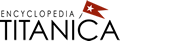

In [134]:
z = re.split("<span style=[^<>]+>", y)
z = z[1:]
z

In [135]:
z[:5]

['<a title="Rhoda Mary \'Rosa\' Abbott" itemprop=url href=/titanic-survivor/rhoda-mary-rosa-abbott.html><span itemprop=name class=fn><span itemprop=familyName>ABBOTT</span>, <span itemprop=honorificPrefix>Mrs</span> <span itemprop=givenName>Rhoda Mary \'Rosa\'</span></span></a></span><td nowrap><a title="Age 39" href=/titanic-ages/39.html>39</a><td><a title="3rd Class Passenger" href=/titanic-third-class-passengers/><span>3rd Class Passenger</span></a><td><div>CA2673</div><div>£20 5s</div><td><a title="Boarded the Titanic in Southampton" href=/titanic-passengers-crew-embarked/place-1/southampton.html>Southampton</a><td><td><a title="Rescued in lifeboat A" href=/titanic/lifeboats/lifeboat-a/>A</a> <td><div style=min-height:75px;min-width:100px;max-width:100px><img class=profile alt="Photograph of Rhoda Mary \'Rosa\' Abbott" width=100 height=75 src=/images/rhoda-rosa-abbott-thm.jpg ezimgfmt="rs rscb35 src ng ngcb35"></div><tr itemscope itemtype=http://schema.org/Person><td>',
 '<a title=

['<a title="Harry Yearsley" itemprop=url href=/titanic-survivor/harry-yearsley.html><span itemprop=name class=fn><span itemprop=familyName>YEARSLEY</span>, <span itemprop=honorificPrefix>Mr</span> <span itemprop=givenName>Harry</span></span></a></span><td nowrap><a title="Age 40" href=/titanic-ages/40.html>40</a><td><a title="Victualling Crew" href=/titanic-victualling-crew/><span>Victualling Crew</span></a><td><td><a title="Boarded the Titanic in Southampton" href=/titanic-passengers-crew-embarked/place-1/southampton.html>Southampton</a><td><a title="First class saloon steward" href=/titanic-jobs/steward.html>First class saloon steward</a><td><td><div style=min-height:75px;min-width:100px;max-width:100px><img class=profile alt="Photograph of Harry Yearsley" width=100 height=75 src=/images/harry-yearsley_thm.jpg ezimgfmt="rs rscb35 src ng ngcb35"></div><tr itemscope itemtype=http://schema.org/Person><td>',
 '<a title="Marie Grice Young" itemprop=url href=/titanic-survivor/marie-grice-y
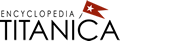

In [136]:
z[-5:]

In [137]:
n = len(z)
d = {
    "FamilyName": [""] * n,
    "GivenName": [""] * n,
    "Prefix": [""] * n,
    "Age": [""] * n,
    "Class": [""] * n,
    "Join": [""] * n,
    "url": [""] * n,
    "Price": [""] * n,
}
df = pd.DataFrame(d)

In [138]:
# focus on passenger 1
# grab the age of the passenger
age_pattern = re.compile(r"Age (\d+)")
print(age_pattern.search(z[1]).group(1))

for i in range(n):
    match = age_pattern.search(z[i])
    d["Age"][i] = match.group(1) if match else ""

print(d["Age"])

16
['39', '16', '25', '28', '38', '27', '19', '21', '', '23', '5', '3', '2', '25', '29', '24', '', '19', '42', '42', '16', '62', '19', '36', '53', '35', '3', '23', '38', '5', '18', '24', '20', '15', '33', '18', '28', '46', '18', '36', '26', '47', '29', '31', '50', '32', '22', '24', '35', '4', '1', '12', '37', '46', '34', '26', '33', '19', '39', '46', '32', '20', '31', '25', '19', '28', '22', '39', '45', '30', '61', '45', '22', '31', '28', '22', '37', '42', '22', '42', '18', '59', '44', '44', '15', '34', '20', '21', '58', '26', '18', '39', '41', '20', '36', '39', '42', '26', '28', '', '35', '52', '58', '36', '36', '36', '14', '11', '36', '33', '22', '25', '47', '27', '32', '32', '36', '30', '45', '48', '32', '52', '25', '26', '42', '28', '22', '33', '19', '33', '25', '38', '17', '30', '8', '34', '64', '39', '23', '22', '55', '16', '30', '36', '9', '3', '20', '43', '16', '21', '64', '39', '26', '49', '35', '38', '45', '51', '33', '29', '27', '33', '18', '27', '48', '8', '28', '34', '36',

In [139]:
len(d["Age"])

712

In [140]:
# Count the number of empty values in 'Age'
empty_count = d['Age'].count('') + d['Age'].count(None)
print(f"Number of empty values in 'Age': {empty_count}")

Number of empty values in 'Age': 7


In [141]:
z[8]  # </span></span></a></span><td nowrap>10m<td><a title="3rd Class Passenger", not Age 10 format.

'<a title="Philip Aks" itemprop=url href=/titanic-survivor/frank-philip-aks.html><span itemprop=name class=fn><span itemprop=familyName>AKS</span>, <span itemprop=honorificPrefix>Master</span> <span itemprop=givenName>Philip</span></span></a></span><td nowrap>10m<td><a title="3rd Class Passenger" href=/titanic-third-class-passengers/><span>3rd Class Passenger</span></a><td><div>392091</div><div>£9 7s</div><td><a title="Boarded the Titanic in Southampton" href=/titanic-passengers-crew-embarked/place-1/southampton.html>Southampton</a><td><td><td><div style=min-height:75px;min-width:100px;max-width:100px><img class=profile alt="Photograph of Philip Aks" width=100 height=75 src=/images/philip-aks_T1.jpg ezimgfmt="rs rscb35 src ng ngcb35"></div><tr itemscope itemtype=http://schema.org/Person><td>'

Task for today  
1. Use regular expression to extract all age information  
2. Grab the other covariates, starting from Family Name and Given Name.  
The class variable is more complicated.  

In [142]:
html_string = z[8]

# Use re.search to extract the age information
match = re.search(r'>(\d+)m<', html_string)

# Check if the match is found before accessing the group
if match:
    age = match.group(1)
    print(age)
else:
    print("Age information not found.")

10


In [143]:
for i in range(n):
    match = re.search(r'Age (\d+)', z[i])
    if match:
        d["Age"][i] = match.group(1)
    else:
        match_m = re.search(r'>(\d+)m<', z[i])
        d["Age"][i] = match_m.group(1) if match_m else ""
        print(f"Age format with m: {d['Age'][i]}")

print(d["Age"])

Age format with m: 10
Age format with m: 11
Age format with m: 10
Age format with m: 2
Age format with m: 9
Age format with m: 5
Age format with m: 10
['39', '16', '25', '28', '38', '27', '19', '21', '10', '23', '5', '3', '2', '25', '29', '24', '11', '19', '42', '42', '16', '62', '19', '36', '53', '35', '3', '23', '38', '5', '18', '24', '20', '15', '33', '18', '28', '46', '18', '36', '26', '47', '29', '31', '50', '32', '22', '24', '35', '4', '1', '12', '37', '46', '34', '26', '33', '19', '39', '46', '32', '20', '31', '25', '19', '28', '22', '39', '45', '30', '61', '45', '22', '31', '28', '22', '37', '42', '22', '42', '18', '59', '44', '44', '15', '34', '20', '21', '58', '26', '18', '39', '41', '20', '36', '39', '42', '26', '28', '10', '35', '52', '58', '36', '36', '36', '14', '11', '36', '33', '22', '25', '47', '27', '32', '32', '36', '30', '45', '48', '32', '52', '25', '26', '42', '28', '22', '33', '19', '33', '25', '38', '17', '30', '8', '34', '64', '39', '23', '22', '55', '16', '30'

In [144]:
# Count the number of empty values in 'Age'
empty_count = d['Age'].count('') + d['Age'].count(None)
print(f"Number of empty values in 'Age': {empty_count}")

Number of empty values in 'Age': 0


In [145]:
z[15]  # <td><a title="Engineering Crew" href=/titanic-engineering-crew/><span>Engineering Crew</span></a><td><td>

'<a title="Ernest Frederick Allen" itemprop=url href=/titanic-survivor/ernest-frederick-allen.html><span itemprop=name class=fn><span itemprop=familyName>ALLEN</span>, <span itemprop=honorificPrefix>Mr</span> <span itemprop=givenName>Ernest Frederick</span></span></a></span><td nowrap><a title="Age 24" href=/titanic-ages/24.html>24</a><td><a title="Engineering Crew" href=/titanic-engineering-crew/><span>Engineering Crew</span></a><td><td><a title="Boarded the Titanic in Southampton" href=/titanic-passengers-crew-embarked/place-1/southampton.html>Southampton</a><td><a title=Trimmer href=/titanic-jobs/trimmer.html>Trimmer</a><td><td><div style=min-height:75px;min-width:100px;max-width:100px><img class=profile alt="Photograph of Ernest Frederick Allen" width=100 height=75 src=/files/1/allen-ernest_thm.jpg ezimgfmt="rs rscb35 src ng ngcb35"></div><tr itemscope itemtype=http://schema.org/Person><td>'

In [146]:
for i, html_text in enumerate(z):
    # Parse HTML using BeautifulSoup
    soup = BeautifulSoup(html_text, 'html.parser')

    # Extract information
    df.at[i, 'FamilyName'] = soup.find('span', itemprop='familyName').text.strip()
    df.at[i, 'GivenName'] = soup.find('span', itemprop='givenName').text.strip()
    df.at[i, 'Prefix'] = soup.find('span', itemprop='honorificPrefix').text.strip()

    # Extract age using regular expressions
    age_match = re.search(r'Age (\d+)', html_text)
    if age_match:
        df.at[i, 'Age'] = age_match.group(1)
    else:
        age_match_m = re.search(r'>(\d+)m<', html_text)
        df.at[i, 'Age'] = age_match_m.group(1) if age_match_m else ""

    # Extract class type
    # Special cases: 1. Crew, 2. Restaurant Staff 3. Repeated Names in Class type
    # <a title="Helen Ragnhild Ostby First Class Passenger" itemprop="url" href="/titanic-survivor/helen-ragnhild-ostby.html"><span itemprop="name" class="fn"><span itemprop="familyName">OSTBY</span>, <span itemprop="honorificPrefix">Miss</span> <span itemprop="givenName">Helen Ragnhild</span></span></a>
    class_elements = soup.find_all('a', title=lambda t: t and ('Class Passenger' in t or 'Crew' in t or 'Restaurant Staff' in t))
    class_element_without_url = [element for element in class_elements if 'itemprop="url"' not in str(element)]
    if class_element_without_url:
        df.at[i, 'Class'] = class_element_without_url[-1].text.strip()  # Use the last one if there are multiple
    else:
        df.at[i, 'Class'] = ""

    df.at[i, 'Join'] = soup.find('a', title=lambda t: t and 'Boarded the Titanic' in t).text.strip()

    # https://www.encyclopedia-titanica.org/titanic-survivor/rhoda-mary-rosa-abbott.html
    df.at[i, 'url'] = 'https://www.encyclopedia-titanica.org' + soup.find('a', itemprop='url')['href'] 

    # Extract all occurrences of the price pattern
    price_elements = soup.find_all('div', text=re.compile(r'£\d+ \ds \dd'))
    df.at[i, 'Price'] = ', '.join([price.text.strip() for price in price_elements]) if price_elements else np.nan

C:\Users\Steven\AppData\Local\Temp\ipykernel_18088\1985808429.py:34: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  price_elements = soup.find_all('div', text=re.compile(r'£\d+ \ds \dd'))


In [147]:
df.url.values

array(['https://www.encyclopedia-titanica.org/titanic-survivor/rhoda-mary-rosa-abbott.html',
       'https://www.encyclopedia-titanica.org/titanic-survivor/karen-marie-abelseth.html',
       'https://www.encyclopedia-titanica.org/titanic-survivor/olaus-jorgensen-abelseth.html',
       'https://www.encyclopedia-titanica.org/titanic-survivor/abelson.html',
       'https://www.encyclopedia-titanica.org/titanic-survivor/shawneene-george-joseph.html',
       'https://www.encyclopedia-titanica.org/titanic-survivor/nassef-cassem-albimona.html',
       'https://www.encyclopedia-titanica.org/titanic-survivor/august-abrahamsson.html',
       'https://www.encyclopedia-titanica.org/titanic-survivor/leah-aks.html',
       'https://www.encyclopedia-titanica.org/titanic-survivor/frank-philip-aks.html',
       'https://www.encyclopedia-titanica.org/titanic-survivor/latifa-baclini.html',
       'https://www.encyclopedia-titanica.org/titanic-survivor/marie-baclini.html',
       'https://www.encyclopedia

In [148]:
# Count NA or empty values in each column
na_counts = df.isna().sum()

# Display the results
print("Number of NA or empty values in each column:")
print(na_counts)

Number of NA or empty values in each column:
FamilyName      0
GivenName       0
Prefix          0
Age             0
Class           0
Join            0
url             0
Price         624
dtype: int64


In [149]:
class_counts = df.groupby('Class').size().reset_index(name='Count')
total_count = class_counts['Count'].sum()

# Print the grouped counts and the total count
print("Grouped Counts:")
print(class_counts)
print("\nTotal Count:", total_count)

Grouped Counts:
                 Class  Count
0  1st Class Passenger    201
1  2nd Class Passenger    118
2  3rd Class Passenger    181
3            Deck Crew     43
4     Engineering Crew     72
5     Restaurant Staff      3
6     Victualling Crew     94

Total Count: 712


In [150]:
class_counts = df.groupby('Price').size().reset_index(name='Count')
total_count = class_counts['Count'].sum()

# Print the grouped counts and the total count
print("Grouped Counts:")
print(class_counts)
print("\nTotal Count:", total_count)

Grouped Counts:
         Price  Count
0   £106 8s 6d      2
1    £11 2s 8d      3
2   £113 5s 6d      2
3    £12 5s 9d      2
4    £12 9s 6d      4
5    £13 8s 4d      2
6    £14 2s 2d      1
7    £14 9s 1d      1
8   £153 9s 3d      3
9    £19 5s 2d      4
10  £211 6s 9d      4
11   £22 7s 2d      3
12   £26 5s 8d      1
13   £26 5s 9d      4
14  £262 7s 6d      6
15    £3 3s 5d      1
16   £30 1s 5d      1
17   £31 7s 9d      3
18   £51 9s 7d      2
19  £512 6s 7d      4
20   £61 3s 6d      1
21   £61 7s 7d      1
22   £63 7s 2d      3
23    £7 4s 6d      5
24    £7 4s 7d      7
25   £71 5s 8d      1
26   £78 5s 4d      2
27    £8 2s 3d      1
28   £82 3s 5d      1
29   £82 5s 4d      2
30   £83 3s 2d      5
31   £83 9s 6d      1
32   £89 2s 1d      2
33    £9 4s 6d      1
34   £91 1s 7d      2

Total Count: 88
